In [5]:
""" Functions for generating 2D grid maps, for AI Lab 2 - path planning.
"""

import random
import numpy as np
import matplotlib.pyplot as plt

percentOfObstacle = 0.9  # 30% - 60%, random

def generateMap2d(size_):

    '''Generates a random 2d map with obstacles (small blocks) randomly distributed. 
       You can specify any size of this map but your solution has to be independent of map size

    Parameters:
    -----------
    size_ : list
        Width and height of the 2d grid map, e.g. [60, 60]. The height and width of the map shall be greater than 20.

    Returns:
    --------
        map2d : array-like, shape (size_[0], size_[1])
           A 2d grid map, cells with a value of 0: Free cell; 
                                                -1: Obstacle;
                                                -2: Start point;
                                                -3: Goal point;
    '''
    
    size_x, size_y = size_[0], size_[1]

    map2d = np.random.rand(size_y, size_x)
    perObstacles_ = percentOfObstacle
    map2d[map2d <= perObstacles_] = 0
    map2d[map2d > perObstacles_] = -1

    yloc, xloc = [np.random.random_integers(0, size_x-1, 2), np.random.random_integers(0, size_y-1, 2)]
    while (yloc[0] == yloc[1]) and (xloc[0] == xloc[1]):
        yloc, xloc = [np.random.random_integers(0, size_x-1,2), np.random.random_integers(0, size_y-1, 2)]

    map2d[xloc[0]][yloc[0]] = -2
    map2d[xloc[1]][yloc[1]] = -3
    

    return map2d

In [6]:
# Generate 2d grid map with rotated-H-shape object
def generateMap2d_obstacle(size_):
    '''Generates a random 2d map with a rotated-H-shape object in the middle and obstacles (small blocks) randomly distributed. 
       You can specify any size of this map but your solution has to be independent of map size

    Parameters:
    -----------
    size_ : list
        Width and height of the 2d grid map, e.g. [60, 60]. The height and width of the map shall be greater than 40.

    Returns:
    --------
        map2d : array-like, shape (size_[0], size_[1])
           A 2d grid map, cells with a value of 0: Free cell; 
                                               -1: Obstacle;
                                               -2: Start point;
                                               -3: Goal point;
                                            
       [ytop, ybot, minx] : list
           information of the rotated-H-shape object
           ytop - y coordinate of the top horizontal wall/part
           ybot - y coordinate of the bottom horizontal wall/part
           minx - X coordinate of the vertical wall 
    '''
    
    size_x, size_y = size_[0], size_[1]
    map2d = generateMap2d(size_)

    map2d[map2d==-2] = 0
    map2d[map2d==-3] = 0

    # add special obstacle
    xtop = [np.random.random_integers(5, 3*size_x//10-2), np.random.random_integers(7*size_x//10+3, size_x-5)]
    ytop = np.random.random_integers(7*size_y//10 + 3, size_y - 5)
    xbot = np.random.random_integers(3, 3*size_x//10-5), np.random.random_integers(7*size_x//10+3, size_x-5)
    ybot = np.random.random_integers(5, size_y//5 - 3)


    map2d[ybot, xbot[0]:xbot[1]+1] = -1
    map2d[ytop, xtop[0]:xtop[1]+1] = -1
    minx = (xbot[0]+xbot[1])//2
    maxx = (xtop[0]+xtop[1])//2
    if minx > maxx:
        tempx = minx
        minx = maxx
        maxx = tempx
    if maxx == minx:
        maxx = maxx+1

    map2d[ybot:ytop, minx:maxx] = -1
    startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]

    map2d[startp[1], startp[0]] = -2
    goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]

    map2d[goalp[1],goalp[0]] = -3
    #return map2d, [startp[1], startp[0]], [goalp[1], goalp[0]], [ytop, ybot]
    return map2d, [ytop, ybot, minx, xtop, xbot ]

In [7]:
# helper function for plotting the result
def plotMap(map2d_, path_=None, title_ =''):
    
    '''Plots a map (image) of a 2d matrix with a path from start point to the goal point. 
        cells with a value of 0: Free cell; 
                             -1: Obstacle;
                             -2: Start point;
                             -3: Goal point;
    Parameters:
    -----------
    map2d_ : array-like
        an array with Real Numbers
        
    path_ : array-like
        an array of 2d corrdinates (of the path) in the format of [[x0, y0], [x1, y1], [x2, y2], ..., [x_end, y_end]]
        
    title_ : string
        information/description of the plot

    Returns:
    --------

    '''
    
    import matplotlib.cm as cm
    plt.interactive(False)
    
    colors_nn = int(map2d_.max())
    colors = cm.winter(np.linspace(0, 1, colors_nn))

    colorsMap2d = [[[] for x in range(map2d_.shape[1])] for y in range(map2d_.shape[0])]
    # Assign RGB Val for starting point and ending point
    locStart, locEnd = np.where(map2d_ == -2), np.where(map2d_ == -3)
    
    
    colorsMap2d[locStart[0][0]][locStart[1][0]] = [.0, .0, .0, 1.0]  # black
    colorsMap2d[locEnd[0][0]][locEnd[1][0]] = [0.8, 0.4, 0.1, 0.5]  # brown

    # Assign RGB Val for obstacle
    locObstacle = np.where(map2d_ == -1)
    for iposObstacle in range(len(locObstacle[0])):
        colorsMap2d[locObstacle[0][iposObstacle]][locObstacle[1][iposObstacle]] = [1.0, .0, .0, 1.0]
    # Assign 0
    locZero = np.where(map2d_ == 0)

    for iposZero in range(len(locZero[0])):
        colorsMap2d[locZero[0][iposZero]][locZero[1][iposZero]] = [1.0, 1.0, 1.0, 1.0]

    # Assign Expanded nodes
    locExpand = np.where(map2d_>0)

    for iposExpand in range(len(locExpand[0])):
        _idx_ = int(map2d_[locExpand[0][iposExpand]][locExpand[1][iposExpand]]-1)
        colorsMap2d[locExpand[0][iposExpand]][locExpand[1][iposExpand]] = colors[_idx_]

    for irow in range(len(colorsMap2d)):
        for icol in range(len(colorsMap2d[irow])):
            if colorsMap2d[irow][icol] == []:
                colorsMap2d[irow][icol] = [1.0, 0.0, 0.0, 1.0]
                
    if  path_ is not None: path = path_.T.tolist()
    
    plt.figure()
    plt.title(title_)
    plt.imshow(colorsMap2d, interpolation='nearest')
    plt.colorbar()
    if  path_ is not None:plt.plot(path[:][0],path[:][1], color='magenta',linewidth=2.5)
    plt.show()



In [8]:
# import numpy as np
import math
import heapq

# Priority Queue based on heapq
class PriorityQueue:
    def __init__(self):
        self.elements = []
    def isEmpty(self):
        return len(self.elements) == 0
    def add(self, priority, item):
        heapq.heappush(self.elements,(priority,item))
    def remove(self):
        return heapq.heappop(self.elements)

In [9]:
def get_quadrant(point):
    row_x, col_y=point

    
    if row_x >=0  and row_x <=30 and col_y >=0 and col_y<=30:
        return 'quadrant 1'
    
    if row_x >=30  and row_x <=60 and col_y >=0 and col_y<=30:
        return 'quadrant 2'
    
    if row_x >=30  and row_x <=60 and col_y >=30 and col_y<=60:
        return 'quadrant 3'

    if row_x >=0  and row_x <=30 and col_y >=30 and col_y<=60:
        return 'quadrant 4'


In [10]:
def get_initial_goal(map1, info,start_position):
    
    if info is not None:
        
        ytop, ybot, minx, xtop, xbot = info
        if get_quadrant(start_position)== 'quadrant 1':
            for i in range(10, 20):
                if map1[ybot-4][i]==0:
                    return ybot-5, i 
                else:
                    print(' no free lunch')
                    return -1
                
        if get_quadrant(start_position)== 'quadrant 2':
            for i in range(10,20):
                if map1[ytop-4][i]==0:
                    return ytop-5, i
                    
                else:
                    print(' no free lunch')
                    return -1   

In [11]:
import math 
import random
#math.sqrt(x)
def get_neighbors(current, start_position, goal_position,map1, heuristic_type, info):
    x,y =current
    adjacent_cells=[]
    
    shift = [[-1, 0 ], # go up
            [ 0, -1], # go left
            [ 1, 0 ], # go down
            [ 0, 1 ]] # go right
    
    if heuristic_type=='manhattan':
    
        for i in range(len(shift)):
            x1 = x + shift[i][0]
            y1 = y + shift[i][1]
            
            dist_to_goal_x= abs(goal_position[0] -x1)
            dist_to_goal_y= abs(goal_position[1]-y1)
            h= abs(dist_to_goal_x) + abs(dist_to_goal_y)
            dist_to_start_x= abs(x1- start_position[0])
            dist_to_start_y= abs(y1-start_position[1])
            g= abs(dist_to_start_x) + abs(dist_to_start_y)
            heuristic=g+h
  
            #check if outside the boundary
            if x1 >= 0 and x1 < len(map1) and y1 >=0 and y1 <len(map1[0]):
                #move to adjacent cell if only its value is zero
                if map1[x1][y1] == 0 or map1[x1][y1] == -3:
                    adjacent_cells.append((heuristic, (x1, y1)))
            
    elif heuristic_type=='euclidian':
        
        for i in range(len(shift)):
            x1 = x + shift[i][0]
            y1 = y + shift[i][1]
            dist_to_goal_x= goal_position[0] -x1
            dist_to_goal_y= goal_position[1]-y1
            h= math.sqrt(dist_to_goal_x**2 + dist_to_goal_y**2)
            dist_to_start_x= x1- start_position[0]
            dist_to_start_y= y1-start_position[1]
            g= math.sqrt(dist_to_start_x**2 + dist_to_start_y**2)
            heuristic=g+h


                
            #check if outside the boundary
            if x1 >= 0 and x1 < len(map1) and y1 >=0 and y1 <len(map1[0]):
                #move to adjacent cell if only its value is zero
                if map1[x1][y1] == 0 or map1[x1][y1] == -3:
                    adjacent_cells.append((heuristic, (x1, y1)))



                    
    return adjacent_cells


In [12]:
# An example of search algorithm, feel free to modify and implement the missing part

def Astar_search_new(map1, heuristic_type,info=None):

    exp_map = np.copy(map1)
    for row in range(len(map1)):
        for column in range(len(map1)):
            if map1[row][column]==-2:
                xs, ys= row,column
                
            if map1[row][column]==-3:
                xg, yg= row,column
                
                
    
    start_position=(xs, ys)
    goal_position=(xg, yg)

    #new heuristic add a new intermediate goal
    #Informed search, we have some information about
    #the environment
    initial_goal=get_initial_goal(map1, info, start_position)
    xinit, yinit=initial_goal
    init_val=exp_map[xinit][yinit]
    exp_map[xinit][yinit]=-3
    

    if initial_goal==-1:
        print('error in intial goal')
        return -1
        
    
    
    #heuristic f(n)=g(n) + h(n)
    if heuristic_type=='manhattan':
        
        dist_to_goal_x= abs(initial_goal[0] -start_position[0])
        dist_to_goal_y= abs(initial_goal[1]-start_position[1])
        h= abs(dist_to_goal_x) + abs(dist_to_goal_y)
        dist_to_start_x= 0
        dist_to_start_y= 0
        g= abs(dist_to_start_x) + abs(dist_to_start_y)
        
        heuristic=g+h

    elif heuristic_type=='euclidian':
                
        dist_to_goal_x= initial_goal[0] -start_position[0]
        dist_to_goal_y= initial_goal[1]-start_position[1]
        h= math.sqrt(dist_to_goal_x**2 + dist_to_goal_y**2)
        
        dist_to_start_x= 0
        dist_to_start_y= 0
        g= math.sqrt(dist_to_start_x**2 + dist_to_start_y**2)
        heuristic=g+h

    # set to store visited cells
    visited=set()
    visited_value=(heuristic,start_position)
    
    visited.add(visited_value)
    
    # Boolean found if goal is reached
    found_initial_goal=False
    found_final_goal=False

    # priority queue 
    #frontier 1 for search to initial goal-near top or 
    #bot obstacle
    #frontier 2 for search to the actual goal
    frontier_1 = PriorityQueue()
    #frontier_2 = PriorityQueue()
    # path taken
    came_from=dict()


    # add starting cell to priority queue
    frontier_1.add(heuristic, start_position)
    
    #cost variable to count number of expanded nodes
    cost=0

    
    while not frontier_1.isEmpty():
        
        

        h_cost, current = frontier_1.remove()

        # check if the goal is reached
        if current == initial_goal:
            found_initial_goal=True
            exp_map[xinit][yinit]=init_val
            break
 
        # for each neighbour of the current cell return expanded adjacent cells
        # (avoid repetitions bu using set visited)
        cells=get_neighbors(current, start_position, initial_goal,exp_map, heuristic_type,info)
        for next1 in cells:
            if next1 not in visited:
                visited.add(next1)
                heuristic,(x,y)=next1
                cost+=1
                if exp_map[x][y]!=-3:exp_map[x][y]=cost

                # add next cell to priority list
                frontier_1.add(heuristic, (x,y)) ###Counter check which is the priority and item.
                
                #add to path
                came_from[(x,y)]=tuple(current)
               
    
           

    #heuristic f(n)=g(n) + h(n)
    if heuristic_type=='manhattan':
        
        dist_to_goal_x= abs(goal_position[0] -initial_goal[0])
        dist_to_goal_y= abs(goal_position[1]-initial_goal[1])
        h= abs(dist_to_goal_x) + abs(dist_to_goal_y)
        dist_to_start_x= 0
        dist_to_start_y= 0
        g= abs(dist_to_start_x) + abs(dist_to_start_y)
        
        heuristic=g+h

    elif heuristic_type=='euclidian':
                
        dist_to_goal_x= goal_position[0] -initial_goal[0]
        dist_to_goal_y= goal_position[1]-initial_goal[1]
        h= math.sqrt(dist_to_goal_x**2 + dist_to_goal_y**2)
        
        dist_to_start_x= 0
        dist_to_start_y= 0
        g= math.sqrt(dist_to_start_x**2 + dist_to_start_y**2)
        heuristic=g+h

    # set to store visited cells
    visited=set()
    visited_value=(heuristic,initial_goal)
    
    visited.add(visited_value)
    
    # Boolean found if goal is reached
    found_final_goal=False

    # priority queue 
    #frontier 2 for search to the actual goal

    frontier_2 = PriorityQueue()


    # add starting cell to priority queue
    frontier_2.add(heuristic, initial_goal)

               
    while not frontier_2.isEmpty():
        
        

        h_cost, current = frontier_2.remove()

        # check if the goal is reached
        if current == goal_position:
            found_final_goal=True
            break
 
        # for each neighbour of the current cell return expanded adjacent cells
        # (avoid repetitions bu using set visited)
        cells=get_neighbors(current, initial_goal, goal_position,exp_map, heuristic_type,info)
        for next1 in cells:
            if next1 not in visited:
                visited.add(next1)
                heuristic,(x,y)=next1
                cost+=1
                if exp_map[x][y]!=-3:exp_map[x][y]=cost

                # add next cell to priority list
                frontier_2.add(heuristic, (x,y)) ###Counter check which is the priority and item.
                
                #add to path
                came_from[(x,y)]=tuple(current)

     
    if found_initial_goal==False and found_final_goal==False : 
        print("No path to goal")
        return -1
    else:
        a,b=initial_goal
        initial_goal2=b,a
        reverse_path = [initial_goal2]
        while tuple(initial_goal) != tuple(start_position):
            initial_goal = came_from[tuple(initial_goal)]
            x2,y2=initial_goal
            if (y2,x2) not in reverse_path: reverse_path.append((y2,x2))
            #path2=list(reversed(reverse_path))
            
        a,b=goal_position
        goal_position2=b,a
        
        reverse_path.append(goal_position2)
        while tuple(goal_position) != tuple(initial_goal):
            goal_position = came_from[tuple(goal_position)]
            x2,y2=goal_position
            if (y2,x2) not in reverse_path: reverse_path.append((y2,x2))
            path2=list(reversed(reverse_path))
            #print(path2)


        
        path1=np.array(path2)
        #print("path", path1)
        #plotMap(map1)
        #print('')
        plotMap(exp_map)
        #plotMap(exp_map, path1,'path')
        return cost, len(path1)

C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_15720\1400279826.py:36: DeprecationWarning: This function is deprecated. Please call randint(0, 59 + 1) instead
  yloc, xloc = [np.random.random_integers(0, size_x-1, 2), np.random.random_integers(0, size_y-1, 2)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_15720\2930334196.py:33: DeprecationWarning: This function is deprecated. Please call randint(5, 16 + 1) instead
  xtop = [np.random.random_integers(5, 3*size_x//10-2), np.random.random_integers(7*size_x//10+3, size_x-5)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_15720\2930334196.py:33: DeprecationWarning: This function is deprecated. Please call randint(45, 55 + 1) instead
  xtop = [np.random.random_integers(5, 3*size_x//10-2), np.random.random_integers(7*size_x//10+3, size_x-5)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_15720\2930334196.py:34: DeprecationWarning: This function is deprecated. Please call randint(45, 55 + 1) instead
  ytop = np.random.ran

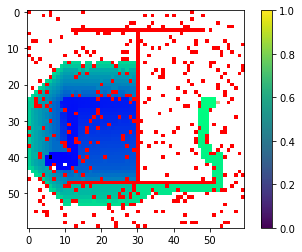

(1072, 102)

In [13]:
map2, info=generateMap2d_obstacle([60,60])
Astar_search_new(map2, 'manhattan',info)

C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_15720\1400279826.py:36: DeprecationWarning: This function is deprecated. Please call randint(0, 59 + 1) instead
  yloc, xloc = [np.random.random_integers(0, size_x-1, 2), np.random.random_integers(0, size_y-1, 2)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_15720\2930334196.py:33: DeprecationWarning: This function is deprecated. Please call randint(5, 16 + 1) instead
  xtop = [np.random.random_integers(5, 3*size_x//10-2), np.random.random_integers(7*size_x//10+3, size_x-5)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_15720\2930334196.py:33: DeprecationWarning: This function is deprecated. Please call randint(45, 55 + 1) instead
  xtop = [np.random.random_integers(5, 3*size_x//10-2), np.random.random_integers(7*size_x//10+3, size_x-5)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_15720\2930334196.py:34: DeprecationWarning: This function is deprecated. Please call randint(45, 55 + 1) instead
  ytop = np.random.ran

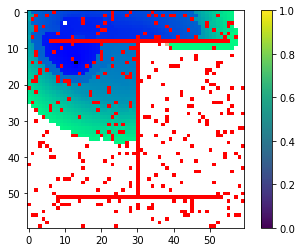

(1111, 105)

In [14]:
map2, info=generateMap2d_obstacle([60, 60])
Astar_search_new(map2, 'euclidian', info)

C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_15720\1400279826.py:36: DeprecationWarning: This function is deprecated. Please call randint(0, 59 + 1) instead
  yloc, xloc = [np.random.random_integers(0, size_x-1, 2), np.random.random_integers(0, size_y-1, 2)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_15720\2930334196.py:33: DeprecationWarning: This function is deprecated. Please call randint(5, 16 + 1) instead
  xtop = [np.random.random_integers(5, 3*size_x//10-2), np.random.random_integers(7*size_x//10+3, size_x-5)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_15720\2930334196.py:33: DeprecationWarning: This function is deprecated. Please call randint(45, 55 + 1) instead
  xtop = [np.random.random_integers(5, 3*size_x//10-2), np.random.random_integers(7*size_x//10+3, size_x-5)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_15720\2930334196.py:34: DeprecationWarning: This function is deprecated. Please call randint(45, 55 + 1) instead
  ytop = np.random.ran

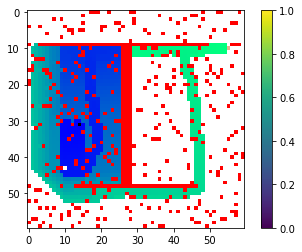

C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_15720\2930334196.py:51: DeprecationWarning: This function is deprecated. Please call randint(10, 53 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_15720\2930334196.py:54: DeprecationWarning: This function is deprecated. Please call randint(10, 53 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


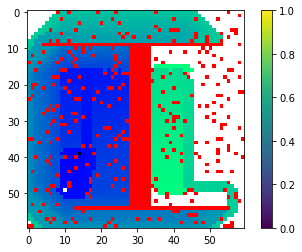

C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_15720\2930334196.py:51: DeprecationWarning: This function is deprecated. Please call randint(7, 53 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_15720\2930334196.py:54: DeprecationWarning: This function is deprecated. Please call randint(7, 53 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


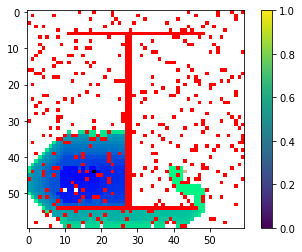

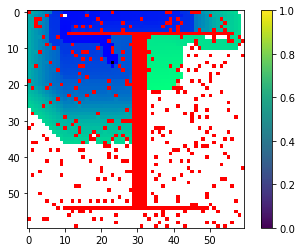

C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_15720\2930334196.py:51: DeprecationWarning: This function is deprecated. Please call randint(9, 46 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_15720\2930334196.py:54: DeprecationWarning: This function is deprecated. Please call randint(9, 46 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


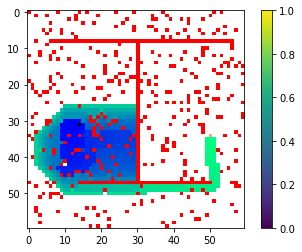

C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_15720\2930334196.py:51: DeprecationWarning: This function is deprecated. Please call randint(8, 49 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_15720\2930334196.py:54: DeprecationWarning: This function is deprecated. Please call randint(8, 49 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


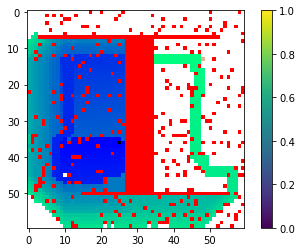

C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_15720\2930334196.py:51: DeprecationWarning: This function is deprecated. Please call randint(9, 51 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_15720\2930334196.py:54: DeprecationWarning: This function is deprecated. Please call randint(9, 51 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


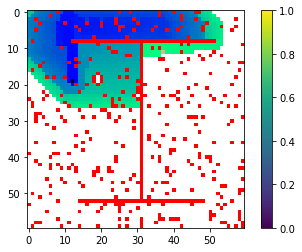

C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_15720\2930334196.py:51: DeprecationWarning: This function is deprecated. Please call randint(9, 47 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_15720\2930334196.py:54: DeprecationWarning: This function is deprecated. Please call randint(9, 47 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


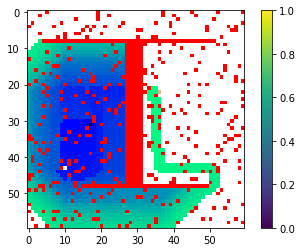

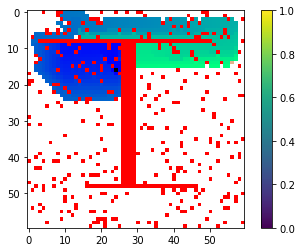

C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_15720\2930334196.py:51: DeprecationWarning: This function is deprecated. Please call randint(8, 54 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_15720\2930334196.py:54: DeprecationWarning: This function is deprecated. Please call randint(8, 54 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


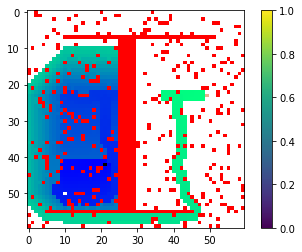

C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_15720\2930334196.py:51: DeprecationWarning: This function is deprecated. Please call randint(9, 48 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_15720\2930334196.py:54: DeprecationWarning: This function is deprecated. Please call randint(9, 48 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


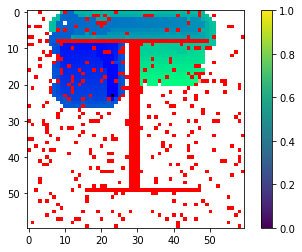

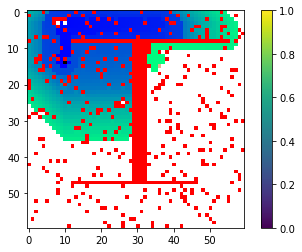

C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_15720\2930334196.py:51: DeprecationWarning: This function is deprecated. Please call randint(8, 52 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_15720\2930334196.py:54: DeprecationWarning: This function is deprecated. Please call randint(8, 52 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


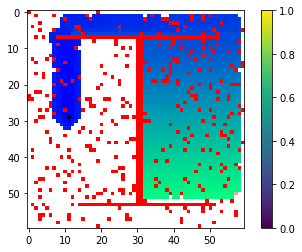

C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_15720\2930334196.py:51: DeprecationWarning: This function is deprecated. Please call randint(9, 44 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_15720\2930334196.py:54: DeprecationWarning: This function is deprecated. Please call randint(9, 44 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


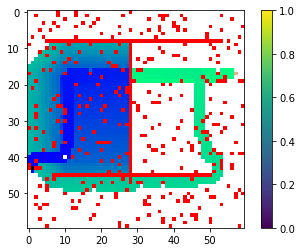

C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_15720\2930334196.py:51: DeprecationWarning: This function is deprecated. Please call randint(8, 46 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_15720\2930334196.py:54: DeprecationWarning: This function is deprecated. Please call randint(8, 46 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


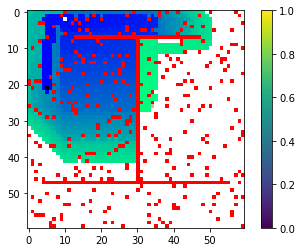

C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_15720\2930334196.py:51: DeprecationWarning: This function is deprecated. Please call randint(8, 44 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_15720\2930334196.py:54: DeprecationWarning: This function is deprecated. Please call randint(8, 44 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


 no free lunch


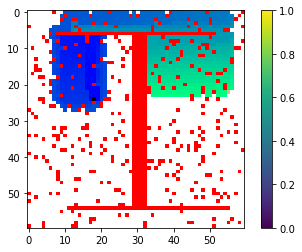

C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_15720\2930334196.py:51: DeprecationWarning: This function is deprecated. Please call randint(8, 47 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_15720\2930334196.py:54: DeprecationWarning: This function is deprecated. Please call randint(8, 47 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


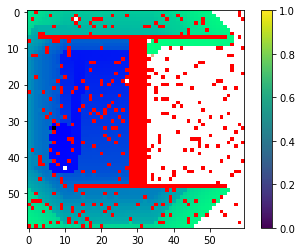

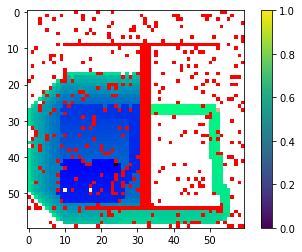

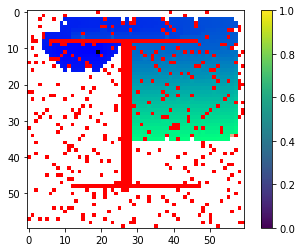

C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_15720\2930334196.py:51: DeprecationWarning: This function is deprecated. Please call randint(8, 51 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_15720\2930334196.py:54: DeprecationWarning: This function is deprecated. Please call randint(8, 51 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


 no free lunch


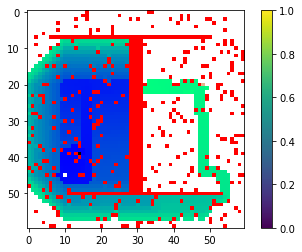

C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_15720\2930334196.py:51: DeprecationWarning: This function is deprecated. Please call randint(6, 45 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_15720\2930334196.py:54: DeprecationWarning: This function is deprecated. Please call randint(6, 45 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_15720\2930334196.py:51: DeprecationWarning: This function is deprecated. Please call randint(6, 47 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_15720\2930334196.py:54: DeprecationWarning: This function is deprecated. Please call randint(6, 47 + 1) instead
  goalp = [np.random.random_integers

 no free lunch


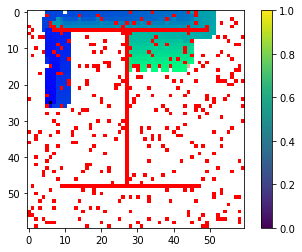

C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_15720\2930334196.py:51: DeprecationWarning: This function is deprecated. Please call randint(7, 54 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Taimoor Ahmad\AppData\Local\Temp\ipykernel_15720\2930334196.py:54: DeprecationWarning: This function is deprecated. Please call randint(7, 54 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


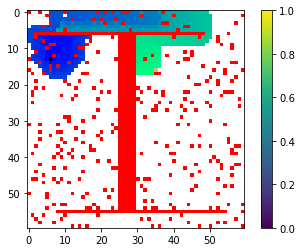

[1127, 2189, 654, 1233, 637, 1589, 907, 1505, 770, 1193, 818, 1125, 1518, 1213, 1329, 896, 1919, 1258, 1093, 1467, 526, 505]
[125, 127, 96, 119, 82, 139, 102, 125, 119, 128, 119, 106, 140, 123, 117, 110, 158, 112, 119, 110, 99, 103]
[0.32226133346557617, 0.35547852516174316, 0.4013819694519043, 0.31830859184265137, 0.30550122261047363, 0.35506391525268555, 0.3167550563812256, 0.33417701721191406, 0.3689539432525635, 0.32053589820861816, 0.29625916481018066, 0.3163166046142578, 0.3720057010650635, 0.4110274314880371, 0.33902454376220703, 0.3148009777069092, 0.36327028274536133, 0.3350701332092285, 0.3324391841888428, 0.4215521812438965, 0.29747867584228516, 0.3094367980957031]
1157.7727272727273
117.18181818181819
0.3412317796186967
425.2166219938194
16.165722331909475
0.035137978175162704


In [15]:
#Run the program 20 times Greedy search with manhattan distance with Obstacle
import time
import numpy
expanded_obstacle_ctr=[]
path_obstacle_taken=[]
time_obstacle_taken=[]
#Astar_search_new(map1, heuristic_type,info=None)
for i in range(25):
    map3, info=generateMap2d_obstacle([60, 60])
    try:
        start=time.time()
        exp_obstacle_nodes, path_new_Astar=Astar_search_new(map3, 'manhattan',info)
    except:
        continue
    stop=time.time()
    #print(type(exp_cntr),type(path))
    expanded_obstacle_ctr.append(exp_obstacle_nodes)
    path_obstacle_taken.append(path_new_Astar)
    timed=stop-start
    time_obstacle_taken.append(timed) 


expanded_nodes_obstacle_mean= numpy.mean(expanded_obstacle_ctr)
path_obstacle_mean= numpy.mean(path_obstacle_taken)
time_obstacle_mean= numpy.mean(time_obstacle_taken)
expanded_nodes_obstacle_std_dev = numpy.std(expanded_obstacle_ctr)
path_mean_obstacle_std_dev= numpy.std(path_obstacle_taken)
time_mean_obstacle_std_dev= numpy.std(time_obstacle_taken)

print(expanded_obstacle_ctr)
print(path_obstacle_taken)
print(time_obstacle_taken)
print(expanded_nodes_obstacle_mean)
print(path_obstacle_mean)
print(time_obstacle_mean)
print(expanded_nodes_obstacle_std_dev)
print(path_mean_obstacle_std_dev)
print(time_mean_obstacle_std_dev)



In [ ]:
#Run the program 20 times Greedy search with eclidian distance with Obstacle

import time
import numpy
expanded_obstacle_ctr=[]
path_obstacle_taken=[]
time_obstacle_taken=[]

for i in range(25):
    map4, info=generateMap2d_obstacle([60, 60])
    start=time.time()
    try:
        exp_obstacle_nodes1, path_new_Astar=Astar_search_new(map4,'euclidian', info)
    except:
        continue
    stop=time.time()
    #print(type(exp_cntr),type(path))
    expanded_obstacle_ctr.append(exp_obstacle_nodes1)
    path_obstacle_taken.append(path_new_Astar)
    timed=stop-start
    time_obstacle_taken.append(timed) 


expanded_nodes_obstacle_mean= numpy.mean(expanded_obstacle_ctr)
path_obstacle_mean= numpy.mean(path_obstacle_taken)
time_obstacle_mean= numpy.mean(time_obstacle_taken)
expanded_nodes_obstacle_std_dev = numpy.std(expanded_obstacle_ctr)
path_mean_obstacle_std_dev= numpy.std(path_obstacle_taken)
time_mean_obstacle_std_dev= numpy.std(time_obstacle_taken)

print(expanded_obstacle_ctr)
print(path_obstacle_taken)
print(time_obstacle_taken)
print(expanded_nodes_obstacle_mean)
print(path_obstacle_mean)
print(time_obstacle_mean)
print(expanded_nodes_obstacle_std_dev)
print(path_mean_obstacle_std_dev)
print(time_mean_obstacle_std_dev)